
#Linear Regression with Gradient Descent


Make sure you remove and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `LAB_SECTION` below:

In [24]:
NAME = "Kazi Nahian Mahmood"
ID = "20301160"
LAB_SECTION = "09"

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable. 

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable). The data points can be in N-dimensional space. For simplicity of visualization, we'll only work with 2d data points for now. 

Let's create a set of 50 data points $(X_i,Y_i)$ where $X$ is a value between 0 to 200 and $Y = 2X - 3 + \Delta$ where, $\Delta$ is a random value between -20 to 20.

In [25]:
import numpy as np
import sympy as sp

X = np.linspace(0, 200, 50)  #generating 50 X between 0 to 200 with uniform difference between each value
delta = np.random.uniform(-20, 20, X.size) # generating randon delta
Y = 2*X - 3 + delta #calculating Y


Let's plot the data!

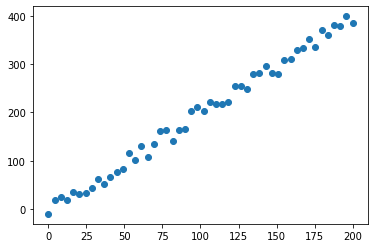

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

If we take a look at the plot. It becomes intuitively clear that a straight line can somewhat fit this set of data. the equation of a 2 dimensional straight line is,
$$y = mx + b$$ 

We know the values of $x$ and $y$, how do we calculate $m$ and $b$?

The trick is to randomly choose values for $m$ and $b$ at ftrst and calculate $y$ for them. Obviously, this will produce some error. We calculate the amount of error using an error function which is,

$$e(m,b) = \frac{1}{2N}((Y - (mX + b))^2)$$
or,
$$e(m,b) = \frac{1}{2N}((Y - y)^2)$$

Where, Y is the actual value and $mX+b$ or $y$ is the predicted value with the randomly generated $m$ and $b$

Once we generate the initial $m$ and $b$, then we need to find the correct $m$ and $b$ using an iteative way. In order to do that, we calculate the gradient of the error function. The gradients of the error function are the partial derivative of the error function with respect to all the unknowns. There are two unknowns in our error function, Namely $m$ and $b$. So, the partial derivatives are,

$$ \frac{\partial e(m,b)}{\partial b} = \frac{1}{N}(b+mx-y)$$
$$ \frac{\partial e(m,b)}{\partial m} = \frac{1}{N}(-x*(y-mx-b))$$

Once we figure out the derivatives, we calculate the gradient using all the data points,

$$gradient_b = \frac{1}{N} \sum_{n=1}^{N} (b+mx_n-y_n)$$
$$gradient_m = \frac{1}{N} \sum_{n=1}^{N} (-x_n*(y_n-mx_n-b))$$

Finally, we do,

$$m = m - \alpha * gradient_m$$
$$b = b - \alpha * gradient_b$$

Here, $\alpha$ is a learning rate that is used to control the speed of correction. Choosing a very big $\alpha$ in gradient descent may cause divergent and choosing a very small $\alpha$ will make the learning process really slow.

We keep on repeating this process to find the optimal $m$ and $b$ and the error gets reduced. After sufficient amount of iterations, we should find the $m$ and $b$ that optimally fits the data points

##Task 1

Complete the `gradient_descent` function below. You do not need to work on the graphs below. If the function is finished properly, you shloud see logical graphs as outputs.

In [27]:
def gradient_descent(b_val, m_val, x_val, y_val, learning_rate, num_iterations):


    # Defining the error function
    x,y,m,b,n = sp.symbols('x y m b n')
    n_val = float(len(x_val))
    
    error_function =  (1 / (2 * n_val)) * ((y_val - (m_val * x_val + b_val)) ** 2) #YOUR CODE HERE 

    #calcule the partial derivatives
    
    error_function_b = sp.diff(error_function, b) #YOUR CODE HERE
    error_function_m = sp.diff(error_function, m) #YOUR CODE HERE

    # repeat for num_iterations
    for j in range(num_iterations): 
      b_gradient = 0
      m_gradient = 0
      for i in range(int(n_val)):
          b_gradient = (1 / n_val) * (b_val + m_val * (x_val[i] - y_val[i])) #YOUR CODE HERE
          m_gradient = (1 / n_val) * (-x_val[i] * (y_val[i] - m_val * x_val[i] - b_val)) #YOUR CODE HERE

        #update the value for b and m    
      b_val = b_val - learning_rate * b_gradient #YOUR CODE HERE
      m_val = m_val - learning_rate * m_gradient #YOUR CODE HERE
        
    return [b_val, m_val]

Inntially we are randomly taking $m$ and $b$ to be 0, which will produce not so correct predictions.

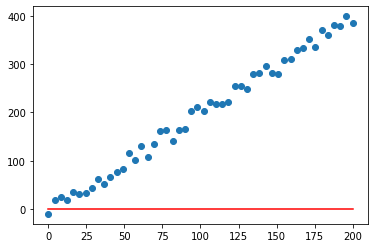

In [28]:
m_val = 0
b_val = 0

predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')


Here, we will use 2 iterations to see that our prediction have improved slightly.

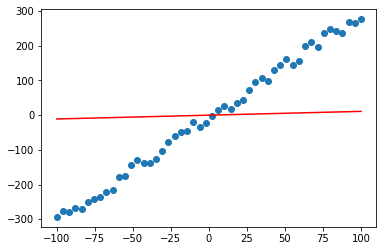

In [34]:
vals = gradient_descent(0, 0, X, Y, .0001, 2)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')





Now we will perform 10 iterations. We should see very accurate results here.

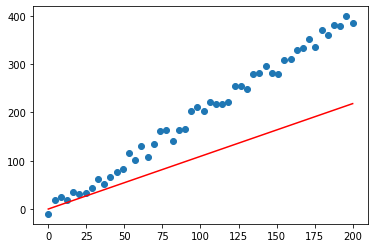

In [30]:
vals = gradient_descent(0, 0, X, Y, .0001, 10)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

##Task 2 [BONUS]

Now perform a similar regression model for $y = 3x-7$, and predict for $xϵ [-100,100]$, where you may determine necessary number of points. Also have to use `gradient_descent` function previously designed and hence plot the predicted graph. You may choose initial points, the range for delta ($Δ$), learning rate ($α$) and number of iteration (by trial and error) for which you will get better predicted outcome.

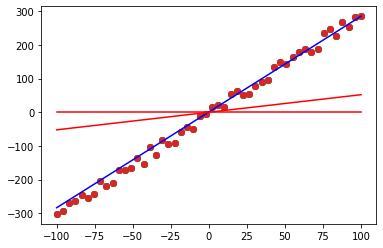

In [36]:
X = np.linspace(-100, 100, 50)  #generating 50 X between 0 to 200 with uniform difference between each value
delta = np.random.uniform(-20, 20, X.size) # generating randon delta
Y = 3*X - 7 + delta #calculating Y
import matplotlib.pyplot as plt
plt.scatter(X, Y)
def gradient_descent(b_val, m_val, x_val, y_val, learning_rate, num_iterations):


    # Defining the error function
    x,y,m,b,n = sp.symbols('x y m b n')
    n_val = float(len(x_val))
    
    error_function =  (1 / (2 * n_val)) * ((y_val - (m_val * x_val + b_val)) ** 2) #YOUR CODE HERE 

    #calcule the partial derivatives
    
    error_function_b = sp.diff(error_function, b) #YOUR CODE HERE
    error_function_m = sp.diff(error_function, m) #YOUR CODE HERE

    # repeat for num_iterations
    for j in range(num_iterations): 
      b_gradient = 0
      m_gradient = 0
      for i in range(int(n_val)):
          b_gradient = (1 / n_val) * (b_val + m_val * (x_val[i] - y_val[i])) #YOUR CODE HERE
          m_gradient = (1 / n_val) * (-x_val[i] * (y_val[i] - m_val * x_val[i] - b_val)) #YOUR CODE HERE

        #update the value for b and m    
      b_val = b_val - learning_rate * b_gradient #YOUR CODE HERE
      m_val = m_val - learning_rate * m_gradient #YOUR CODE HERE
        
    return [b_val, m_val]
m_val = 0
b_val = 0

predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

vals = gradient_descent(0, 0, X, Y, .0001, 800)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='b')

vals = gradient_descent(0, 0, X, Y, .0001, 10)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')
#YOUR CODE HERE